In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm

## First reformat groups to simple repeat - Alu - satellite

In [2]:
with open('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/finalized/T2T.ChrY.Final.fasta.out') as f:
    Lines = f.readlines()
    
    AluFlag = 0
    aluEnd =0
    
    AluCasetteDict = {}
    group = 0
    AluCasetteDict[str(group)]=[]

    for line in tqdm(Lines): 
        
        goodLine = ' '.join(line.split())
            
        if AluFlag == 0:
            
            if goodLine.split(" ")[10] == 'SINE/Alu':
                aluEnd=int(goodLine.split(" ")[6].strip())
                AluCasetteDict[str(group)].append(goodLine)
                AluFlag+=1
                
            else:
                continue
                
        else:
            
            
            if (int(goodLine.split(" ")[5])-int(aluEnd)) < 4000:
                
                AluCasetteDict[str(group)].append(goodLine)

                if goodLine.split(" ")[10] == 'SINE/Alu':
                    aluEnd=int(goodLine.split(" ")[6].strip())

                else:
                    continue
                    
            else:
                
                group+=1
                AluCasetteDict[str(group)]=[]

                if goodLine.split(" ")[10] == 'SINE/Alu':
                    aluEnd=int(goodLine.split(" ")[6].strip())
                    AluCasetteDict[str(group)].append(goodLine)

                else:
                    continue
                    

            
    
    
    f.close()

100%|█████████████████████████████████| 29612/29612 [00:00<00:00, 336530.77it/s]


In [3]:
AluCasetteDict

{'0': ['1366 19.9 0.0 5.4 chrY 28661430 28661721 (33798308) C AluY SINE/Alu (12) 289 13 36026 *',
  '3990 9.5 0.0 0.2 chrY 28661721 28662289 (33797740) C HSATI Satellite (0) 568 1 36027',
  '414 24.2 3.9 3.7 chrY 28662297 28663849 (33796180) + (TATATAA)n Simple_repeat 1 1555 (0) 36028',
  '1361 19.8 0.0 5.5 chrY 28663852 28664140 (33795889) C AluY SINE/Alu (15) 286 13 36029 *',
  '4095 9.0 0.0 0.0 chrY 28664140 28664707 (33795322) C HSATI Satellite (0) 568 1 36030',
  '407 24.3 3.9 3.8 chrY 28664715 28666266 (33793763) + (TATATAA)n Simple_repeat 1 1554 (0) 36031',
  '1350 19.9 0.0 5.4 chrY 28666267 28666558 (33793471) C AluY SINE/Alu (12) 289 13 36032 *',
  '4017 9.5 0.0 0.0 chrY 28666558 28667125 (33792904) C HSATI Satellite (0) 568 1 36033',
  '381 26.8 2.9 3.9 chrY 28667133 28668673 (33791356) + (TATATAT)n Simple_repeat 1 1526 (0) 36034',
  '1372 19.5 0.0 5.5 chrY 28668676 28668963 (33791066) C AluY SINE/Alu (12) 289 17 36035',
  '4065 9.2 0.0 0.0 chrY 28668967 28669534 (33790495) C

In [4]:
goodKeys = []
for x in AluCasetteDict.keys():
    if len(AluCasetteDict[x])>0:
        goodKeys.append(x)
        

goodAluGroupDict={}
tallyCount=0
for x in AluCasetteDict.keys():
    if x in goodKeys:
        goodAluGroupDict[tallyCount] = AluCasetteDict[x]
        tallyCount+=1
        continue
    else:
        continue

In [5]:
repeatBlocks = goodAluGroupDict.copy()

In [6]:
firstAlus = [repeatBlocks[x][0] for x in list(repeatBlocks.keys())[:-3]]
print(len(firstAlus))

43


In [7]:
lastAlus = []
for key in list(repeatBlocks.keys())[:-3]:
    lastAlu = 'temp'
    for repeat in repeatBlocks[key]:
        if 'SINE/Alu' in repeat:
            lastAlu=repeat
        else:
            continue
    lastAlus.append(lastAlu)
print(len(lastAlus))

43


In [8]:
LineNumbers = {'First':[], 'Last':[]}
with open('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/finalized/T2T.ChrY.Final.fasta.out') as f:
    Lines = f.readlines()
    
    lineNum = 0

    for line in tqdm(Lines): 
        
        goodLine = ' '.join(line.split())
        
        if goodLine.split(" ")[10] == 'SINE/Alu':
            if goodLine in firstAlus:
                LineNumbers['First'].append(str(goodLine)+" "+str(lineNum))
                lineNum+=1
            elif goodLine in lastAlus:
                LineNumbers['Last'].append(str(goodLine)+" "+str(lineNum))
                lineNum+=1
            else:
                lineNum+=1
                
        else:
            lineNum+=1

100%|█████████████████████████████████| 29612/29612 [00:00<00:00, 430720.60it/s]


In [9]:
new_repeatBlocks = {x:[] for x in list(repeatBlocks.keys())[:-3]}

In [10]:
with open('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/finalized/T2T.ChrY.Final.fasta.out') as f:
    Lines = f.readlines()
    

    groups = list(new_repeatBlocks.keys())
    groupNum = 0
    
    for group in groups:
        lineNum = 0

        for line in tqdm(Lines): 

            goodLine = ' '.join(line.split())

            if int(lineNum) == (int(LineNumbers['First'][groupNum].split(" ")[-1].strip())-1) and (int(LineNumbers['First'][groupNum].split(" ")[5].strip())-int(goodLine.split(" ")[6].strip())) <= 4000:
                new_repeatBlocks[group].append(goodLine)   
                lineNum+=1
            elif int(lineNum) >= int(LineNumbers['First'][groupNum].split(" ")[-1].strip()) and int(lineNum) <= int(LineNumbers['Last'][groupNum].split(" ")[-1].strip()):
                new_repeatBlocks[group].append(goodLine)
                lineNum+=1
            elif int(lineNum) == (int(LineNumbers['Last'][groupNum].split(" ")[-1].strip())+1) and (int(goodLine.split(" ")[5].strip()) - int(LineNumbers['Last'][groupNum].split(" ")[6].strip())) <= 4000:
                new_repeatBlocks[group].append(goodLine)
                lineNum+=1
            else:
                lineNum+=1
                                                                                                  
        groupNum+=1

100%|█████████████████████████████████| 29612/29612 [00:00<00:00, 288977.66it/s]


In [11]:
for x in list(repeatBlocks.keys())[-3:]:
    new_repeatBlocks[x] = repeatBlocks[x] 

In [12]:
goodAluGroupDict = new_repeatBlocks.copy()

In [13]:
RepeatBlockLengths = []
for key in new_repeatBlocks.keys():
    RepeatBlockLengths.append((int(new_repeatBlocks[key][-1].split(" ")[6].strip())-int(new_repeatBlocks[key][0].split(" ")[5].strip()))+1)

In [14]:
#exportListDF = pd.DataFrame(data=RepeatBlockLengths, columns=['RepeatBlockLength'])
#exportListDF.to_csv("/home/mark/Desktop/chromosome_y/repeatBlockFiles/ListCSVs/T2T_RepeatBlock.csv")

In [15]:
AllAlus = 0
for key in new_repeatBlocks.keys():
    totalAlus = 0
    for repeat in new_repeatBlocks[key]:
        if 'SINE/Alu' in repeat:
            totalAlus+=1
            AllAlus+=1
        else:
            continue
            
    print("Repeat Block: "+str(key))
    print("Total Alus: "+str(totalAlus))
print("All Alus: "+str(AllAlus))

Repeat Block: 0
Total Alus: 11
Repeat Block: 1
Total Alus: 16
Repeat Block: 2
Total Alus: 15
Repeat Block: 3
Total Alus: 94
Repeat Block: 4
Total Alus: 70
Repeat Block: 5
Total Alus: 103
Repeat Block: 6
Total Alus: 99
Repeat Block: 7
Total Alus: 489
Repeat Block: 8
Total Alus: 33
Repeat Block: 9
Total Alus: 64
Repeat Block: 10
Total Alus: 42
Repeat Block: 11
Total Alus: 105
Repeat Block: 12
Total Alus: 95
Repeat Block: 13
Total Alus: 38
Repeat Block: 14
Total Alus: 67
Repeat Block: 15
Total Alus: 48
Repeat Block: 16
Total Alus: 118
Repeat Block: 17
Total Alus: 350
Repeat Block: 18
Total Alus: 358
Repeat Block: 19
Total Alus: 51
Repeat Block: 20
Total Alus: 65
Repeat Block: 21
Total Alus: 47
Repeat Block: 22
Total Alus: 145
Repeat Block: 23
Total Alus: 321
Repeat Block: 24
Total Alus: 157
Repeat Block: 25
Total Alus: 125
Repeat Block: 26
Total Alus: 273
Repeat Block: 27
Total Alus: 278
Repeat Block: 28
Total Alus: 107
Repeat Block: 29
Total Alus: 74
Repeat Block: 30
Total Alus: 118
Repe

In [16]:
new_repeatBlocks

{0: ['373 24.5 3.2 3.8 chrY 28660073 28661429 (33798600) + (ATATAAT)n Simple_repeat 1 1350 (0) 36025',
  '1366 19.9 0.0 5.4 chrY 28661430 28661721 (33798308) C AluY SINE/Alu (12) 289 13 36026 *',
  '3990 9.5 0.0 0.2 chrY 28661721 28662289 (33797740) C HSATI Satellite (0) 568 1 36027',
  '414 24.2 3.9 3.7 chrY 28662297 28663849 (33796180) + (TATATAA)n Simple_repeat 1 1555 (0) 36028',
  '1361 19.8 0.0 5.5 chrY 28663852 28664140 (33795889) C AluY SINE/Alu (15) 286 13 36029 *',
  '4095 9.0 0.0 0.0 chrY 28664140 28664707 (33795322) C HSATI Satellite (0) 568 1 36030',
  '407 24.3 3.9 3.8 chrY 28664715 28666266 (33793763) + (TATATAA)n Simple_repeat 1 1554 (0) 36031',
  '1350 19.9 0.0 5.4 chrY 28666267 28666558 (33793471) C AluY SINE/Alu (12) 289 13 36032 *',
  '4017 9.5 0.0 0.0 chrY 28666558 28667125 (33792904) C HSATI Satellite (0) 568 1 36033',
  '381 26.8 2.9 3.9 chrY 28667133 28668673 (33791356) + (TATATAT)n Simple_repeat 1 1526 (0) 36034',
  '1372 19.5 0.0 5.5 chrY 28668676 28668963 (337

In [17]:
#This code makes one file with the coordinates of each Alu in each repeatblock
#with open("/home/mark/Desktop/chromosome_y/repeatBlockFiles/Alus/T2T/T2T_RepeatBlock_Alus.txt", 'a+') as file:
#    for key in new_repeatBlocks.keys():
#        for repeat in new_repeatBlocks[key]:
#            if 'SINE/Alu' in repeat:
#                file.write("RepeatBlock "+str(key)+"\t"+str(repeat.split(" ")[4])+":"+str(repeat.split(" ")[5])+"-"+str(repeat.split(" ")[6])+"\n")
#    file.close()

In [18]:
#Export Blocks Alu coordinates into individual files (Palmetto RegionBlocks)
#for key in new_repeatBlocks.keys():
#    with open("/home/mark/Desktop/chromosome_y/repeatBlockFiles/RepeatMaskSections/T2T/T2T_RepeatBlock_"+str(key)+'.txt', 'a+') as file:
#        for repeat in new_repeatBlocks[key]:
#            file.write(repeat+"\n")
#    file.close()

In [19]:
#This code makes one file with the coordinates of each Alu in each repeatblock
#with open("/home/mark/Desktop/chromosome_y/repeatBlockFiles/Alus/T2T/T2T_RepeatBlock_Alus.txt", 'a+') as file:
    for key in new_repeatBlocks.keys():
        for repeat in new_repeatBlocks[key]:
            if 'SINE/Alu' in repeat:
                if str(repeat.split(" ")[8]) == 'C':
                    if str(key) in endBlockList:
                        file.write("RepeatBlock "+str(key)+"\t"+str(repeat.split(" ")[4])+":"+str(repeat.split(" ")[5])+"-"+str(repeat.split(" ")[6])+"\t"+str('C_antisense')+"\t"+"GRAVEYARD"+"\n")
                    else:
                        file.write("RepeatBlock "+str(key)+"\t"+str(repeat.split(" ")[4])+":"+str(repeat.split(" ")[5])+"-"+str(repeat.split(" ")[6])+"\t"+str('C_antisense')+"\t"+"REPEATBLOCK"+"\n")
                else:
                    if str(key) in endBlockList:
                        file.write("RepeatBlock "+str(key)+"\t"+str(repeat.split(" ")[4])+":"+str(repeat.split(" ")[5])+"-"+str(repeat.split(" ")[6])+"\t"+str('+_sense')+"\t"+"GRAVEYARD"+"\n")

                    else:  
                        file.write("RepeatBlock "+str(key)+"\t"+str(repeat.split(" ")[4])+":"+str(repeat.split(" ")[5])+"-"+str(repeat.split(" ")[6])+"\t"+str('+_sense')+"\t"+"REPEATBLOCK"+"\n")

    file.close()

IndentationError: unexpected indent (52731768.py, line 3)

## Repeat Distribution

In [20]:
endBlockList = [str(x) for x in list(new_repeatBlocks.keys())[-3:]]

In [21]:
GroupSubBlock = {}

for key in goodAluGroupDict.keys():
    
    temporaryGroup = goodAluGroupDict[key].copy()

    
    #Initialize
    interGroup = []
    tempList = []
    first = 0
    second = 0
    switch = 'temp'
    flag=0
    check=0
    lastCheck=0

    groupCount = 0
    
    #Loop through Block
    for repeat in temporaryGroup:
        
        if repeat == temporaryGroup[-1]:
            tempList.append(repeat)
            interGroup.append(tempList)
            
        else:

            if switch == str(repeat.split(" ")[10].strip()) and lastCheck==1:
                tempList.append(repeat)
                switch = str(repeat.split(" ")[10].strip())
                lastCheck=1
                #continue

            elif lastCheck==1 and switch != str(repeat.split(" ")[10].strip()) and str(repeat.split(" ")[10].strip()) != 'SINE/Alu':
                interGroup.append(tempList)
                tempList = []
                tempList.append(repeat)
                switch = str(repeat.split(" ")[10].strip())
                first=1
                lastCheck=0
                second=0
                check=0
                flag=0

            elif lastCheck==1 and str(repeat.split(" ")[10].strip()) == 'SINE/Alu':
                interGroup.append(tempList)
                tempList = []
                tempList.append(repeat)
                lastCheck=0
                first=1
                second=0
                check=0
                flag=1


            ################# If there is no repeats in the group yet / New Group #############################

            else:

                if first==0:

                    if 'SINE/Alu' in repeat:
                        tempList = []
                        tempList.append(repeat)
                        first=1
                        second=0
                        flag=1

                    else:
                        tempList = []
                        tempList.append(repeat)
                        switch= str(repeat.split(" ")[10].strip())
                        first=1
                        second=0
                        flag=0
                        check=0

                ######################### If there is one repeat already ################################     

                elif first == 1 and second == 0:

                    if flag == 1:

                        if 'SINE/Alu' in repeat:
                            interGroup.append(tempList)

                            tempList = []
                            tempList.append(repeat)
                            second = 0
                            flag=1
                            first=1

                        else:

                            check=1
                            first=1
                            second=1
                            tempList.append(repeat)
                            switch = str(repeat.split(" ")[10].strip()) 


                    else:

                        if 'SINE/Alu' in repeat:
                            tempList.append(repeat)
                            first=1
                            second = 1
                            check=0

                        else:

                            if str(repeat.split(" ")[10].strip()) == switch:
                                tempList.append(repeat)
                                second=0
                                first=1
                                flag=0

                            else:
                                tempList = []
                                tempList.append(repeat)
                                switch= str(repeat.split(" ")[10].strip())
                                first=1
                                second=0
                                flag=0
                                check=0
                                #print("ERROR 1")
                                #print(key)
                                #print(tempList)
                                #print(repeat)


                elif first == 1 and second == 1:

                    if check == 1:

                        #If the third is the same append
                        if switch == str(repeat.split(" ")[10].strip()):
                            tempList.append(repeat)
                            first=1
                            second=0
                            flag=1
                            check=0

                        else:

                            #Start a new group
                            if 'SINE/Alu' in repeat:
                                interGroup.append(tempList)
                                tempList = []
                                tempList.append(repeat)
                                flag=1
                                check=0
                                first=1
                                second=0

                            else:
                                interGroup.append(tempList)
                                tempList = []
                                tempList.append(repeat)
                                switch = str(repeat.split(" ")[10].strip())
                                flag=0
                                first=1
                                check=0
                                second=0

                    else:

                        if 'SINE/Alu' in repeat:
                            interGroup.append(tempList)
                            tempList = []
                            tempList.append(repeat)
                            flag=1
                            first=1
                            check=0
                            second=0

                        else:

                            tempList.append(repeat)
                            switch = str(repeat.split(" ")[10].strip())
                            lastCheck=1

    
    GroupSubBlock[key]= []
    for listGroup in interGroup:
        GroupSubBlock[key].append(listGroup)

In [22]:
repeatBlock_distList = []

for key in GroupSubBlock.keys():

    for group in GroupSubBlock[key]:
        
        groupStart = int(group[0].split(" ")[5].strip())
        groupEnd = int(group[-1].split(" ")[6].strip())
        alu = 'temp'
        
        for repeat in group:
            if 'SINE/Alu' in repeat :
                alu = str(repeat.split(" ")[8].strip())+"_"+str(repeat.split(" ")[9].strip())+"_"+str(repeat.split(" ")[5].strip())+"-"+str(repeat.split(" ")[6].strip())
            else:
                continue
                
        repeatBlock_distList.append([int(key), alu, ((groupEnd-groupStart)+1), group])

In [23]:
#import json
#with open('/home/mark/Desktop/chromosome_y/json_dict/T2T_cluster.json', 'w') as fp:
#    json.dump(GroupSubBlock, fp)

In [20]:
rb_df = pd.DataFrame(data=repeatBlock_distList, columns=['RepeatBlock','Alu','Lengths','Group'])

In [21]:
#Make sure not to keep all rows as some are "graveyard" blocks (last 3 Repeat Blocks)
rb_df

,RepeatBlock,Alu,Lengths,Group
0,0,C_AluY_28661430-28661721,2217,[373 24.5 3.2 3.8 chrY 28660073 28661429 (3379...
1,0,C_AluY_28663852-28664140,2411,[414 24.2 3.9 3.7 chrY 28662297 28663849 (3379...
2,0,C_AluY_28666267-28666558,2411,[407 24.3 3.9 3.8 chrY 28664715 28666266 (3379...
3,0,C_AluY_28668676-28668963,2402,[381 26.8 2.9 3.9 chrY 28667133 28668673 (3379...
4,0,C_AluY_28671087-28671377,2403,[358 20.7 8.6 2.8 chrY 28669542 28671048 (3378...
...,...,...,...,...
5928,45,+_AluSx_62119706-62120034,551,[2114 13.0 0.7 0.0 chrY 62119706 62120034 (339...
5929,45,+_AluJb_62121162-62121312,1012,[18 21.8 0.0 0.0 chrY 62120301 62120337 (33969...
5930,45,+_AluSp_62121313-62121610,298,[2085 13.1 0.7 0.3 chrY 62121313 62121610 (338...
5931,45,+_AluJb_62121611-62121770,772,[1569 19.5 0.0 6.5 chrY 62121611 62121770 (338...


In [22]:
#rb_df.to_csv("/home/mark/Desktop/chromosome_y/Dataframes/T2T/T2T_rbDF.csv")

In [26]:
#This code makes one file with the coordinates of each DYZ in each repeatblock
#with open("/home/mark/Desktop/chromosome_y/repeatBlockFiles/DYZ/T2T/T2T_RepeatBlock_DYZs.txt", 'a+') as file:
    for row in rb_df.index:
        if 'C_' in str(rb_df.at[row,'Alu']):
            
            if str(rb_df.at[row,'RepeatBlock']) in endBlockList:
                file.write("RepeatBlock "+str(rb_df.at[row,'RepeatBlock'])+"\t"+str(rb_df.at[row,'Group'][0].split(" ")[4])+":"+str(rb_df.at[row,'Group'][0].split(" ")[5])+"-"+str(rb_df.at[row,'Group'][-1].split(" ")[6])+"\t"+str('C_antisense')+"\t"+"GRAVEYARD"+"\n")

            else:
                file.write("RepeatBlock "+str(rb_df.at[row,'RepeatBlock'])+"\t"+str(rb_df.at[row,'Group'][0].split(" ")[4])+":"+str(rb_df.at[row,'Group'][0].split(" ")[5])+"-"+str(rb_df.at[row,'Group'][-1].split(" ")[6])+"\t"+str('C_antisense')+"\t"+"REPEATBLOCK"+"\n")

        else:
            if str(rb_df.at[row,'RepeatBlock']) in endBlockList:
                file.write("RepeatBlock "+str(rb_df.at[row,'RepeatBlock'])+"\t"+str(rb_df.at[row,'Group'][0].split(" ")[4])+":"+str(rb_df.at[row,'Group'][0].split(" ")[5])+"-"+str(rb_df.at[row,'Group'][-1].split(" ")[6])+"\t"+str('+_sense')+"\t"+"GRAVEYARD"+"\n")

            else:
                file.write("RepeatBlock "+str(rb_df.at[row,'RepeatBlock'])+"\t"+str(rb_df.at[row,'Group'][0].split(" ")[4])+":"+str(rb_df.at[row,'Group'][0].split(" ")[5])+"-"+str(rb_df.at[row,'Group'][-1].split(" ")[6])+"\t"+str('+_sense')+"\t"+"REPEATBLOCK"+"\n")

    file.close()

In [24]:
rb_df['Color'] = 'temp'
rb_df['Block_Size'] = 'temp'

for entry in rb_df.index:
    
    if rb_df.at[entry,'RepeatBlock'] > 42:
        
        if int(rb_df.at[entry,'Lengths']) <= 999:
            rb_df.at[entry,'Color'] = 'black'
            rb_df.at[entry,'Block_Size'] = '<999'

        elif int(rb_df.at[entry,'Lengths']) >= 1000 and int(rb_df.at[entry,'Lengths']) <= 1999:
            rb_df.at[entry,'Color'] = 'black'
            rb_df.at[entry,'Block_Size'] = '1000-1999'

        elif int(rb_df.at[entry,'Lengths']) >= 2000 and int(rb_df.at[entry,'Lengths']) <= 2999:
            rb_df.at[entry,'Color'] = 'black'
            rb_df.at[entry,'Block_Size'] = '2000-2999'

        elif int(rb_df.at[entry,'Lengths']) >= 3000 and int(rb_df.at[entry,'Lengths']) <= 3999:
            rb_df.at[entry,'Color'] = 'black'
            rb_df.at[entry,'Block_Size'] = '3000-3999'
        else:
            rb_df.at[entry,'Color'] = 'magenta'
        
    else:
    
    
        if int(rb_df.at[entry,'Lengths']) <= 999:
            rb_df.at[entry,'Color'] = '#073B4C'
            rb_df.at[entry,'Block_Size'] = '<999'

        elif int(rb_df.at[entry,'Lengths']) >= 1000 and int(rb_df.at[entry,'Lengths']) <= 1999:
            rb_df.at[entry,'Color'] = '#118AB2'
            rb_df.at[entry,'Block_Size'] = '1000-1999'

        elif int(rb_df.at[entry,'Lengths']) >= 2000 and int(rb_df.at[entry,'Lengths']) <= 2999:
            rb_df.at[entry,'Color'] = '#06D6A0'
            rb_df.at[entry,'Block_Size'] = '2000-2999'

        elif int(rb_df.at[entry,'Lengths']) >= 3000 and int(rb_df.at[entry,'Lengths']) <= 3999:
            rb_df.at[entry,'Color'] = '#FFD166'
            rb_df.at[entry,'Block_Size'] = '3000-3999'
        else:
            rb_df.at[entry,'Color'] = 'magenta'


In [28]:
import collections
for x,y in collections.Counter(rb_df[rb_df['RepeatBlock']<43]['Color']).items():
    print(x)
    print(int(y)/len(rb_df[rb_df['RepeatBlock']<43]['Color']))

#06D6A0
0.9855146557600545
#118AB2
0.0081799591002045
#FFD166
0.004601226993865031
#073B4C
0.0017041581458759373


In [33]:
tmpSatellitesList=[]
tmpSatellitesLength=[]

import ast
for x in rb_df[rb_df['RepeatBlock']<43]['Group']:
    for repeat in x:
        if 'Satellite' in repeat:
            tmpSatellitesList.append(repeat.split(" ")[9].strip())
            tmpSatellitesLength.append((int(repeat.split(" ")[6].strip())-int(repeat.split(" ")[5].strip()))+1)

In [38]:
import collections
print(collections.Counter(tmpSatellitesList))
print("\n")
print(collections.Counter(tmpSatellitesLength))

Counter({'HSATI': 5856})


Counter({568: 5406, 567: 213, 569: 75, 564: 66, 562: 38, 563: 29, 566: 14, 560: 6, 570: 5, 565: 2, 521: 1, 579: 1})


In [31]:
#################################################################################

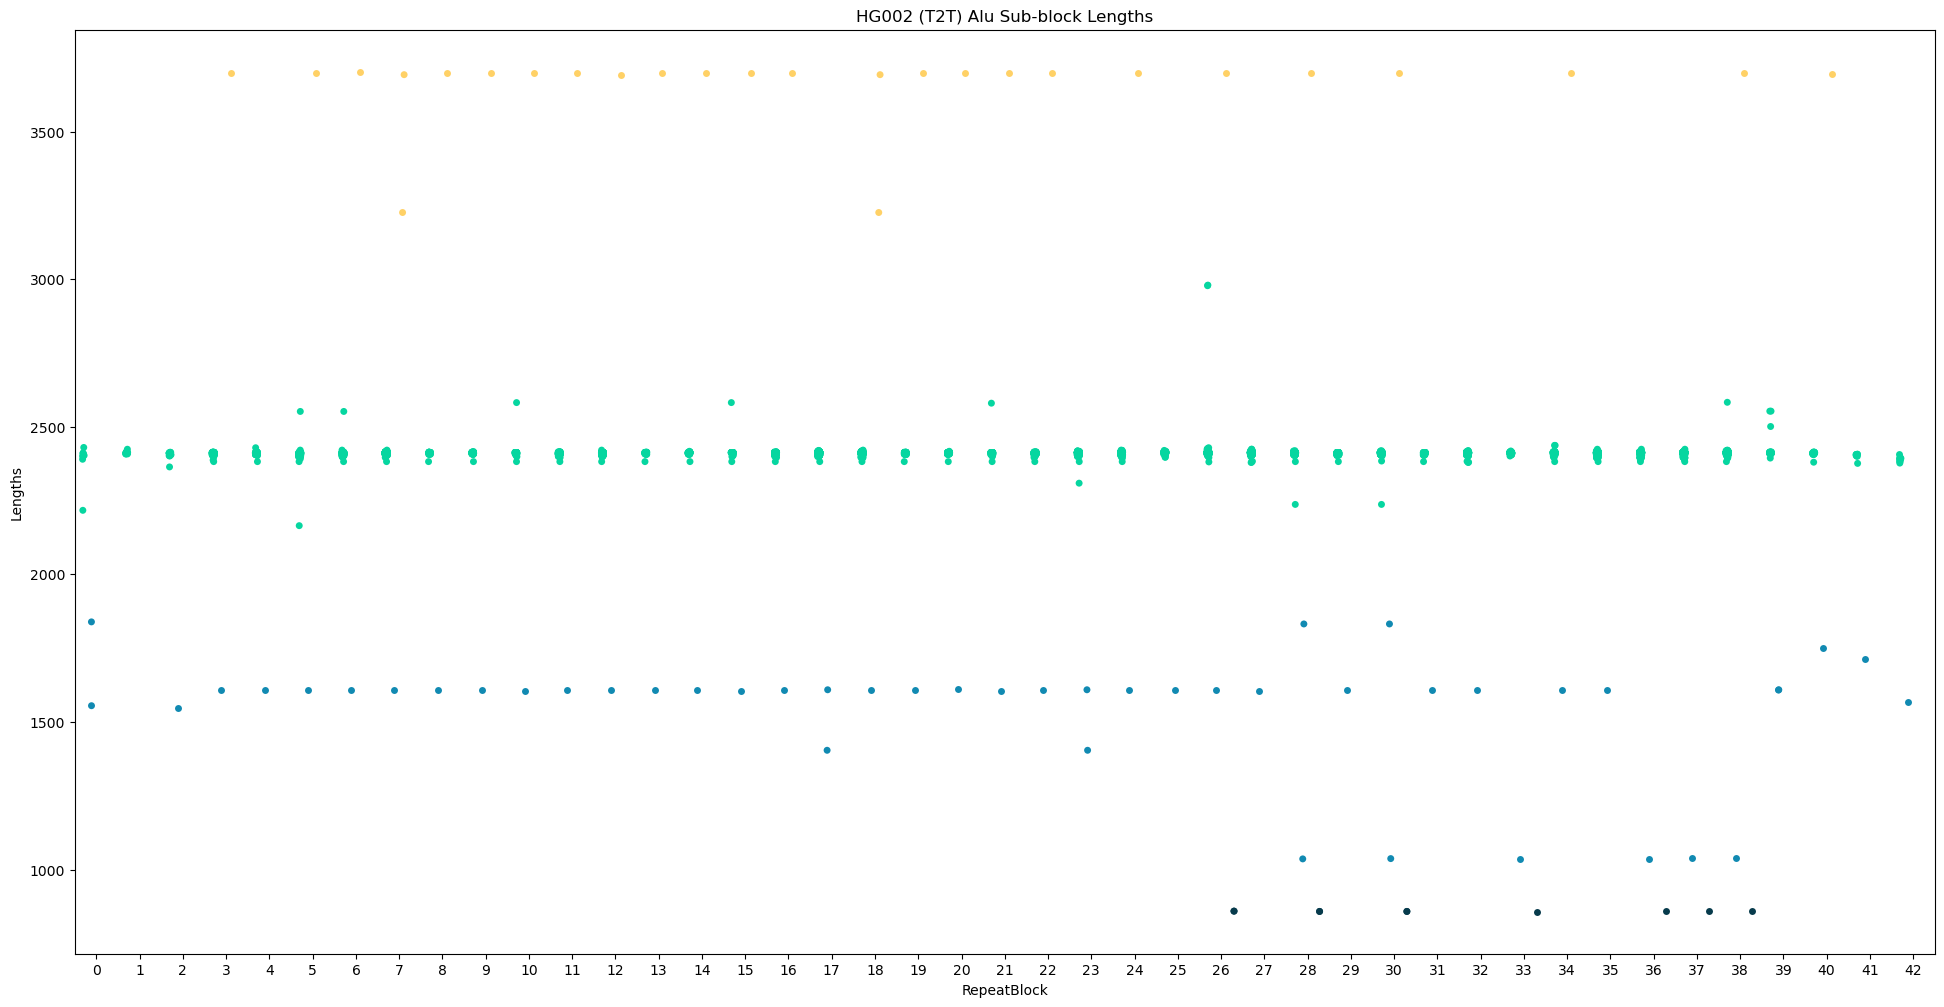

In [31]:
from matplotlib import rcParams
palette = {x:x for x in set(rb_df['Color'])}

plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 24,12
plt.title("HG002 (T2T) Alu Sub-block Lengths")
ax=sns.stripplot(x="RepeatBlock", y="Lengths", data=rb_df[rb_df['RepeatBlock']<43], hue='Color', palette=palette, dodge=True)
ax.get_legend().remove()
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/T2T/T2T_final_AluSubblock_Dots.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [40]:
temprbDF3 = rb_df[rb_df['RepeatBlock']<43].reset_index().set_index("RepeatBlock").copy()
heatDF = pd.DataFrame(index=set(temprbDF3.index), columns=set(temprbDF3['Color'])).fillna(0)
heatDF.index.name='RepeatBlock'
for block in set(temprbDF3.index):
    for key,value in dict(collections.Counter(temprbDF3.loc[block]['Color'])).items():
        #print(key)
        #print(value)
        heatDF.at[block,key]+= int(value)
heatDF.head()

,#FFD166,#073B4C,#118AB2,#06D6A0
RepeatBlock,,,,
0,0,0,2,9
1,0,0,0,16
2,0,0,1,14
3,1,0,1,92
4,0,0,1,69


In [41]:
heatDF2 = heatDF.div(heatDF.sum(axis=1), axis=0).copy()            
heatDF2.head()

,#FFD166,#073B4C,#118AB2,#06D6A0
RepeatBlock,,,,
0,0.000000,0.0,0.181818,0.818182
1,0.000000,0.0,0.000000,1.000000
2,0.000000,0.0,0.066667,0.933333
3,0.010638,0.0,0.010638,0.978723
4,0.000000,0.0,0.014286,0.985714


In [42]:
heatDF_mInfo = pd.DataFrame(index=set(temprbDF3.index), columns=[str(o)+"_"+str(x)+"_"+str(y) for y in set(temprbDF3['Block_Size']) for x in set(temprbDF3['Color']) for o in ["C","+"]]).fillna(0)
heatDF_mInfo.index.name='RepeatBlock'
for block in set(temprbDF3.index):
    for alu in temprbDF3.loc[block].reset_index().index:
        #print(alu)
        heatDF_mInfo.at[block,str(temprbDF3.loc[block].reset_index().at[alu,'Alu'].split("_")[0].strip())+"_"+str(temprbDF3.loc[block].reset_index().at[alu,'Color'])+"_"+str(temprbDF3.loc[block].reset_index().at[alu,'Block_Size'])]+= 1
heatDF_mInfo.head()

,C_#FFD166_1000-1999,+_#FFD166_1000-1999,C_#073B4C_1000-1999,+_#073B4C_1000-1999,C_#118AB2_1000-1999,+_#118AB2_1000-1999,C_#06D6A0_1000-1999,+_#06D6A0_1000-1999,C_#FFD166_2000-2999,+_#FFD166_2000-2999,...,C_#06D6A0_3000-3999,+_#06D6A0_3000-3999,C_#FFD166_<999,+_#FFD166_<999,C_#073B4C_<999,+_#073B4C_<999,C_#118AB2_<999,+_#118AB2_<999,C_#06D6A0_<999,+_#06D6A0_<999
RepeatBlock,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
heatDF_mInfo2 = heatDF_mInfo.div(heatDF_mInfo.sum(axis=1), axis=0).copy()            
heatDF_mInfo2.head()
from scipy.spatial import distance
heatDF_mInfo3 = pd.DataFrame(index=heatDF_mInfo2.sort_index().index, columns=heatDF_mInfo2.sort_index().index).fillna(0.0)
for index in heatDF_mInfo3.index:
    for column in heatDF_mInfo3.columns:
        heatDF_mInfo3.at[index,column]= 1-float(distance.braycurtis(list(heatDF_mInfo.loc[index]), list(heatDF_mInfo.loc[column])))
heatDF_mInfo3.head()

RepeatBlock,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
RepeatBlock,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.222222,0.461538,0.114286,0.148148,0.105263,0.109091,0.024000,0.272727,0.160000,...,0.155556,0.093023,0.032877,0.048443,0.047458,0.035088,0.377358,0.555556,0.571429,0.571429
1,0.222222,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103448,0.195122,0.000000,0.000000
2,0.461538,0.000000,1.000000,0.275229,0.352941,0.254237,0.263158,0.059524,0.625000,0.379747,...,0.297872,0.225564,0.081301,0.095563,0.093645,0.069479,0.526316,0.700000,0.800000,0.800000
3,0.114286,0.000000,0.275229,1.000000,0.853659,0.954315,0.974093,0.322470,0.519685,0.810127,...,0.890173,0.886792,0.415179,0.494624,0.486772,0.385892,0.558824,0.319328,0.192308,0.192308
4,0.148148,0.000000,0.352941,0.853659,1.000000,0.809249,0.828402,0.250447,0.621359,0.940299,...,0.926174,0.744681,0.330189,0.396552,0.389831,0.301310,0.678571,0.400000,0.250000,0.250000


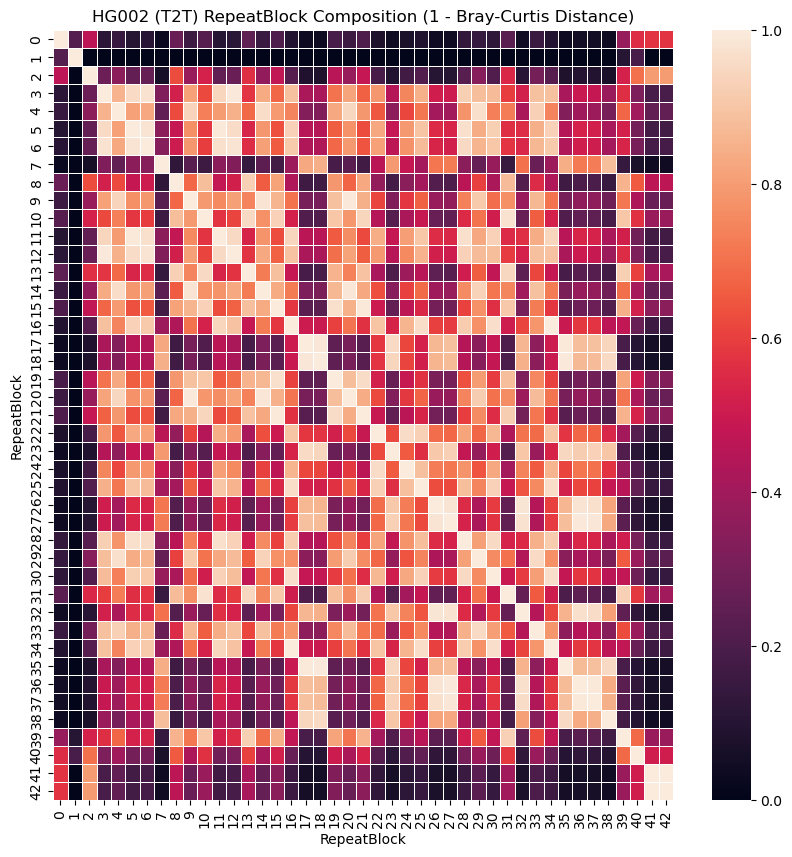

In [47]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 10,10
sns.heatmap(data=heatDF_mInfo3.sort_index(), linewidths=.7, annot=False, vmin=0)
plt.title("HG002 (T2T) RepeatBlock Composition (1 - Bray-Curtis Distance)")
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/T2T/T2T_final_AluHeatmap_0", dpi=300, bbox_inches='tight')
plt.show()

In [36]:
braycrt = heatDF_mInfo3.sort_index().copy()
for rb in braycrt.index:
    
    topHit=0.0
    bestBlock = 0
    flag=0
    
    for block in braycrt.loc[rb]:
        
        if float(block) != 1.0 and float(block) >= topHit:
            
            topHit=float(block)
            bestBlock = list(braycrt.loc[rb].index)[flag]
            
            flag+=1
            
        else:
            flag+=1

    print("Repeat Block: "+str(rb))
    print("Highest Correlated Block: "+str(bestBlock))
    print("1 - (Bray-Curtis Distance): "+str(topHit))
    print("\n")

Repeat Block: 0
Highest Correlated Block: 42
1 - (Bray-Curtis Distance): 0.5714285714285714


Repeat Block: 1
Highest Correlated Block: 0
1 - (Bray-Curtis Distance): 0.2222222222222222


Repeat Block: 2
Highest Correlated Block: 42
1 - (Bray-Curtis Distance): 0.8


Repeat Block: 3
Highest Correlated Block: 12
1 - (Bray-Curtis Distance): 0.9947089947089947


Repeat Block: 4
Highest Correlated Block: 29
1 - (Bray-Curtis Distance): 0.9722222222222222


Repeat Block: 5
Highest Correlated Block: 11
1 - (Bray-Curtis Distance): 0.9903846153846154


Repeat Block: 6
Highest Correlated Block: 5
1 - (Bray-Curtis Distance): 0.9801980198019802


Repeat Block: 7
Highest Correlated Block: 38
1 - (Bray-Curtis Distance): 0.8802736602052451


Repeat Block: 8
Highest Correlated Block: 13
1 - (Bray-Curtis Distance): 0.9295774647887324


Repeat Block: 9
Highest Correlated Block: 20
1 - (Bray-Curtis Distance): 0.9922480620155039


Repeat Block: 10
Highest Correlated Block: 31
1 - (Bray-Curtis Distance): 0.9

In [37]:
################################### VISUALIZE TREE ####################################################

In [38]:
repeatBlockList = list(goodAluGroupDict.keys())
print(repeatBlockList)
BlockListDistance = {x:0 for x in repeatBlockList}
start = 0
for block in repeatBlockList:
    if block == 0:
        #start+=1
        continue
    else:
        #print(start)
        #print(repeatBlockList[start])
        BlockListDistance[block] = int(goodAluGroupDict[block][0].split(" ")[5].strip()) - int(goodAluGroupDict[repeatBlockList[start]][-1].split(" ")[6].strip()) 
        start+=1
        #BlockListDistance[block] = goodAluGroupDict[repeatBlockList[start]][0]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]


In [39]:
#This code prepares the Dataframe to give basic overview of region
for row in rb_df.index:
    if rb_df.at[row,'RepeatBlock']>42:
        rb_df.at[row,'Color']='black'
    else:
        if 'C_' in str(rb_df.at[row,'Alu']):
            rb_df.at[row,'Color']='red'
        else:
            rb_df.at[row,'Color']='blue'

In [54]:
import turtle

In [56]:
turtle.position()
turtle.color('black')
turtle.speed(0)
flag=1
groupFlag = 0
groupNames = list(goodAluGroupDict.keys())
lengthFlag = 0

startPosition = turtle.position()
turtle.color("white")
turtle.setposition(turtle.pos()[0], turtle.pos()[1]+300)
turtle.color("black")
turtle.write("HG002 (T2T) Yq Heterochromatin Repeat Blocks", align="Left")
turtle.color("white")
turtle.setposition(startPosition)

for key in tqdm(list(set(rb_df['RepeatBlock']))[24:]):
    
    totalAlus = len(rb_df[rb_df['RepeatBlock']==key])
        
    turtle.color("black")
    turtle.forward(75)
    currentPosition = turtle.position()
    

    if lengthFlag == 0:
        turtle.setposition(currentPosition)
    else:
        turtle.setposition(turtle.pos()[0]-10, turtle.pos()[1]+20)
        turtle.write(str(BlockListDistance[key]), align="right")
        turtle.setposition(currentPosition)

    currentPosition = turtle.position()
    if (flag % 2) == 0:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]-200)
    else:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]+200)
        
    turtle.write(" Repeat Block: "+str(key), align="left")

    turtle.setposition(currentPosition)
    

    groupFlag+=1
    lengthFlag+=1
    flag+=1
    
    tempDF = rb_df[rb_df['RepeatBlock']==key].copy() 
    for item in tempDF.index:
        
        if 'C_' in tempDF.at[item,'Alu']:
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Lengths']/20)
            turtle.left(90)
            turtle.forward(1)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Lengths']/20)
            turtle.right(90)
            turtle.forward(.5)

        
        elif '+_' in tempDF.at[item,'Alu']:
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Lengths']/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Lengths']/20)
            turtle.left(90)
            turtle.forward(.5)

        
        else:
            turtle.color('black')
            turtle.forward(.5)


100%|███████████████████████████████████████████| 22/22 [05:57<00:00, 16.26s/it]


In [57]:
from PIL import Image

In [58]:
def save_as_png(canvas,fileName):
    # save postscipt image 
    canvas.postscript(file = fileName + '.eps') 
    # use PIL to convert to PNG 
    img = Image.open(fileName + '.eps') 
    img.save(fileName + '.png', 'png') 

In [59]:
ts = turtle.getscreen()
save_as_png(ts.getcanvas(),"/home/mark/Desktop/chromosome_y/Images/T2T/T2T_YqHeterochromatin_RedBlue_piece2")

In [60]:
turtle.bye()

## Look at Sub Blocks

In [76]:
tempHolderList = []
for x,y in collections.Counter(temprbDF3['Lengths']).items():
    for i in range(0,y):
        tempHolderList.append(x)
    
tempDF = pd.DataFrame(data=tempHolderList, columns=['Length'])
tempDF.head()

,Length
0,1967
1,2411
2,2411
3,2411
4,2411


In [78]:
goodAlus = []
tempDF_size = temprbDF3[(temprbDF3['Lengths']>2405) & (temprbDF3['Lengths']< 2415)].copy()

In [79]:
len(tempDF_size)/len(temprbDF3)

0.8637963154626371

In [80]:
for x, y in collections.Counter(tempDF_size['Lengths']).items():
    print("Length: "+str(x)+"\tTotal: "+str(y)+"\tPercentage: "+str(y/len(tempDF_size['Lengths'])))

Length: 2411	Total: 513	Percentage: 0.12293314162473042
Length: 2408	Total: 214	Percentage: 0.05128205128205128
Length: 2413	Total: 1905	Percentage: 0.4565061107117182
Length: 2412	Total: 558	Percentage: 0.13371675053918045
Length: 2410	Total: 201	Percentage: 0.04816678648454349
Length: 2407	Total: 116	Percentage: 0.027797747423915647
Length: 2414	Total: 81	Percentage: 0.019410496046010063
Length: 2409	Total: 213	Percentage: 0.051042415528396834
Length: 2406	Total: 372	Percentage: 0.08914450035945364


In [81]:
selectionDF = tempDF_size[tempDF_size['Lengths']==2413].reset_index().copy()
selectionDF

,RepeatBlock,Alu,Lengths,Group,Color,Block_Size,GuideTree
0,258,+_AluY_1584758-1585049,2413,[4011 9.9 0.0 0.0 HG002-Yq 1584191 1584758 (32...,#06D6A0,2000-2999,lime
1,258,+_AluY_1587178-1587469,2413,[4046 9.3 0.0 0.0 HG002-Yq 1586611 1587178 (32...,#06D6A0,2000-2999,blue
2,258,+_AluY_1601702-1601993,2413,[3932 10.0 0.0 0.0 HG002-Yq 1601135 1601702 (3...,#06D6A0,2000-2999,lime
3,338,C_AluY_1719410-1719701,2413,[359 20.1 9.0 3.0 HG002-Yq 1717856 1719408 (32...,#06D6A0,2000-2999,lime
4,338,C_AluY_1726656-1726947,2413,[379 19.5 9.1 2.7 HG002-Yq 1725102 1726654 (32...,#06D6A0,2000-2999,blue
...,...,...,...,...,...,...,...
1900,8672,C_AluY_29793730-29794021,2413,[421 24.0 3.8 3.8 HG002-Yq 29792176 29793729 (...,#06D6A0,2000-2999,yellow
1901,8672,C_AluY_29798568-29798859,2413,[409 24.4 3.8 3.8 HG002-Yq 29797014 29798567 (...,#06D6A0,2000-2999,lime
1902,8672,C_AluY_29803410-29803701,2413,[418 24.1 3.5 4.0 HG002-Yq 29801856 29803409 (...,#06D6A0,2000-2999,yellow
1903,8672,C_AluY_29808245-29808536,2413,[407 24.7 4.2 3.2 HG002-Yq 29806691 29808244 (...,#06D6A0,2000-2999,blue


In [82]:
goodRows=[]
for row in selectionDF.index:
    if "+_" in str(selectionDF.at[row,'Alu']):
        continue
    else:
        goodRows.append(row)
good_size_DF = selectionDF.loc[goodRows].copy()

In [122]:
#This percentage is calculated by hand for grabbing top 500 
shuffledDF = good_size_DF.sample(frac=0.3729).copy()

In [123]:
#with open("/home/mark/Desktop/chromosome_y/pille_alus.txt", "a+") as file:
#    for row in shuffledDF.index:
#        Start = int(shuffledDF.at[row,'Group'][0].split(" ")[5].strip())
#        End = int(shuffledDF.at[row,'Group'][-1].split(" ")[6].strip())
#        alu = str(shuffledDF.at[row,'Alu'])
#        file.write(str(alu)+"\t"+str(Start)+"\t"+str(End)+"\n")
#    file.close()